# AAVE Liquidation Analysis

Load and analyze AAVE liquidation data from The Graph subgraphs.

In [ ]:
import json
import os
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path(__file__).parent.parent if '__file__' in dir() else Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def load_aave_data(subgraph: str, query_type: str) -> pd.DataFrame:
    """
    Load AAVE data from the data directory as a pandas DataFrame.
    
    Args:
        subgraph: The subgraph name (e.g., 'aave_v3_ethereum')
        query_type: The query type ('liquidations' or 'reserves')
        
    Returns:
        pandas DataFrame with the query results
        
    Example:
        df = load_aave_data('aave_v3_ethereum', 'liquidations')
    """
    data_path = PROJECT_ROOT / 'data' / 'aave' / subgraph / query_type / 'data.json'
    
    if not data_path.exists():
        raise FileNotFoundError(
            f"Data file not found: {data_path}\n"
            f"Run: python aave_liquidations.py --subgraph {subgraph} --query-type {query_type}"
        )
    
    with open(data_path, 'r') as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)
    
    # Convert timestamp columns to datetime if present
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    if 'datetime' in df.columns:
        df['datetime'] = pd.to_datetime(df['datetime'])
    
    return df

In [3]:
def list_available_aave_data() -> dict:
    """
    List all available downloaded AAVE data.
    
    Returns:
        Dictionary mapping subgraph names to lists of available query types
    """
    data_dir = PROJECT_ROOT / 'data' / 'aave'
    available = {}
    
    if not data_dir.exists():
        print("No AAVE data directory found. Run aave_liquidations.py first.")
        return available
    
    for subgraph_dir in data_dir.iterdir():
        if subgraph_dir.is_dir():
            query_types = []
            for query_dir in subgraph_dir.iterdir():
                if query_dir.is_dir() and (query_dir / 'data.json').exists():
                    query_types.append(query_dir.name)
            if query_types:
                available[subgraph_dir.name] = query_types
    
    return available

# Show available data
available = list_available_aave_data()
if available:
    print("Available AAVE data:")
    for subgraph, query_types in available.items():
        print(f"  {subgraph}: {', '.join(query_types)}")
else:
    print("No data available yet. Run: python aave_liquidations.py --query-type liquidations")

Available AAVE data:
  aave_v3_ethereum: liquidations, reserves


## Load Liquidation Data

Load liquidation data from AAVE V3 Ethereum:

In [15]:
# Load liquidation data
df = load_aave_data('aave_v3_ethereum', 'liquidations')
print(f"Loaded {len(df)} liquidations")
df.head()

Loaded 1000 liquidations


,id,timestamp,datetime,user,health_factor,reserve_id,reserve_underlying_asset,collateral_asset,debt_asset,debt_to_cover,liquidated_collateral_amount,profit
0,0x46b7275a69859af102657ae6b460d2cb04f2c4ab31ea...,2025-12-02 15:23:22,2025-12-02 09:23:22,0x1a8d340a41599bcd5737eee8752affa78fa993a7,1177251735400561275,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,10381975561698639159,32326863480,0
1,0x8b875dae378689c59bfa32d5dd890a40def5062610d0...,2025-12-02 15:15:51,2025-12-02 09:15:51,0xf05454c3d16090b652cf5389c9ee520cec477e5e,1157920892373161954235709850086879078532699846...,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,17624713708022763,54684549,0
2,0x11500619de2484e04f526495ce827ac6110962dfa79d...,2025-12-02 13:41:18,2025-12-02 07:41:18,0x51215578b25608c8aa6516d6230aa896dc347976,1157920892373161954235709850086879078532699846...,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0xaf88d065e77c8cc2239327c5edb3a432268e5831,2200001,12246217089737002282,0
3,0x79fedbffd6104cbf1795c6aed6d47f74134723992911...,2025-12-02 03:45:16,2025-12-01 21:45:16,0xc7c9f313f2d3ae32230b96e4233073fefe3123fb,1157920892373161954235709850086879078532699846...,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xf97f4df75117a78c1a5a0dbb814af92458539fb4,234511502036310806,2968266,0
4,0x68eed4bbc9d500a2d198f07be8ea3eb13b8bfa77c822...,2025-12-01 17:35:12,2025-12-01 11:35:12,0x8ff39a1e65b8076d7ea6f5614d84607590641767,1157920892373161954235709850086879078532699846...,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0xaf88d065e77c8cc2239327c5edb3a432268e5831,240628450,1407339897938093232666,0


In [21]:
import numpy as np
tmp = df['health_factor'].values / 1e18
df = df.assign(health = np.where(abs(tmp) > 1e6, np.nan, tmp)).drop(columns=['health_factor'])
df.head()

,id,timestamp,datetime,user,reserve_id,reserve_underlying_asset,collateral_asset,debt_asset,debt_to_cover,liquidated_collateral_amount,profit,health
0,0x46b7275a69859af102657ae6b460d2cb04f2c4ab31ea...,2025-12-02 15:23:22,2025-12-02 09:23:22,0x1a8d340a41599bcd5737eee8752affa78fa993a7,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,10381975561698639159,32326863480,0,1.177252
1,0x8b875dae378689c59bfa32d5dd890a40def5062610d0...,2025-12-02 15:15:51,2025-12-02 09:15:51,0xf05454c3d16090b652cf5389c9ee520cec477e5e,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0x82af49447d8a07e3bd95bd0d56f35241523fbab1,17624713708022763,54684549,0,NaN
2,0x11500619de2484e04f526495ce827ac6110962dfa79d...,2025-12-02 13:41:18,2025-12-02 07:41:18,0x51215578b25608c8aa6516d6230aa896dc347976,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0xaf88d065e77c8cc2239327c5edb3a432268e5831,2200001,12246217089737002282,0,NaN
3,0x79fedbffd6104cbf1795c6aed6d47f74134723992911...,2025-12-02 03:45:16,2025-12-01 21:45:16,0xc7c9f313f2d3ae32230b96e4233073fefe3123fb,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xaf88d065e77c8cc2239327c5edb3a432268e5831,0xf97f4df75117a78c1a5a0dbb814af92458539fb4,234511502036310806,2968266,0,NaN
4,0x68eed4bbc9d500a2d198f07be8ea3eb13b8bfa77c822...,2025-12-01 17:35:12,2025-12-01 11:35:12,0x8ff39a1e65b8076d7ea6f5614d84607590641767,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0x912ce59144191c1204e64559fe8253a0e49e6548,0xaf88d065e77c8cc2239327c5edb3a432268e5831,240628450,1407339897938093232666,0,NaN


<Axes: >

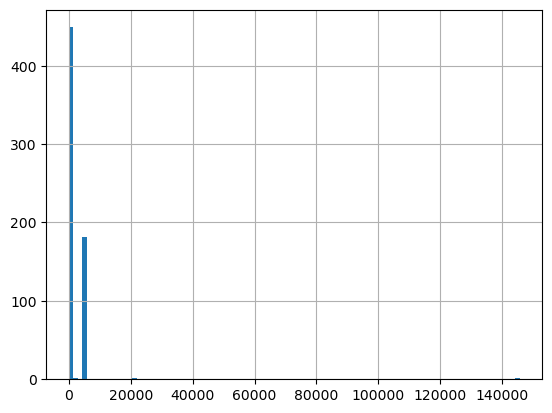

In [28]:
df['health'].dropna().hist(bins=100)

## Basic Analysis

Explore the liquidation data:

In [5]:
# Basic statistics
print("Columns:", df.columns.tolist())
print(f"\nDate range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"\nUnique users liquidated: {df['user'].nunique()}")
print(f"Unique collateral assets: {df['collateral_asset'].nunique()}")
print(f"Unique debt assets: {df['debt_asset'].nunique()}")

Columns: ['id', 'timestamp', 'datetime', 'user', 'reserve_id', 'reserve_underlying_asset', 'collateral_asset', 'debt_asset', 'debt_to_cover', 'liquidated_collateral_amount', 'profit']

Date range: 2025-11-21 06:22:44 to 2025-12-01 11:35:12

Unique users liquidated: 88
Unique collateral assets: 11
Unique debt assets: 8


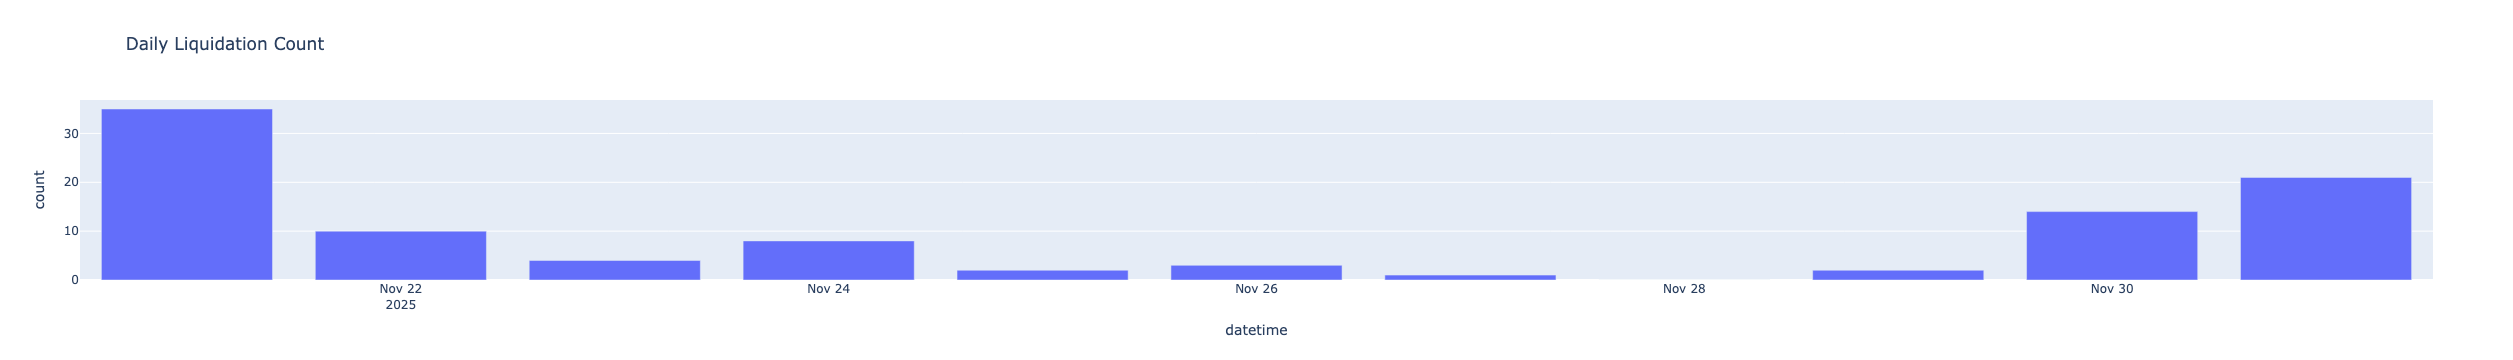

In [6]:
# Liquidations over time
df_daily = df.set_index('datetime').resample('D').size().reset_index(name='count')
px.bar(df_daily, x='datetime', y='count', title='Daily Liquidation Count')

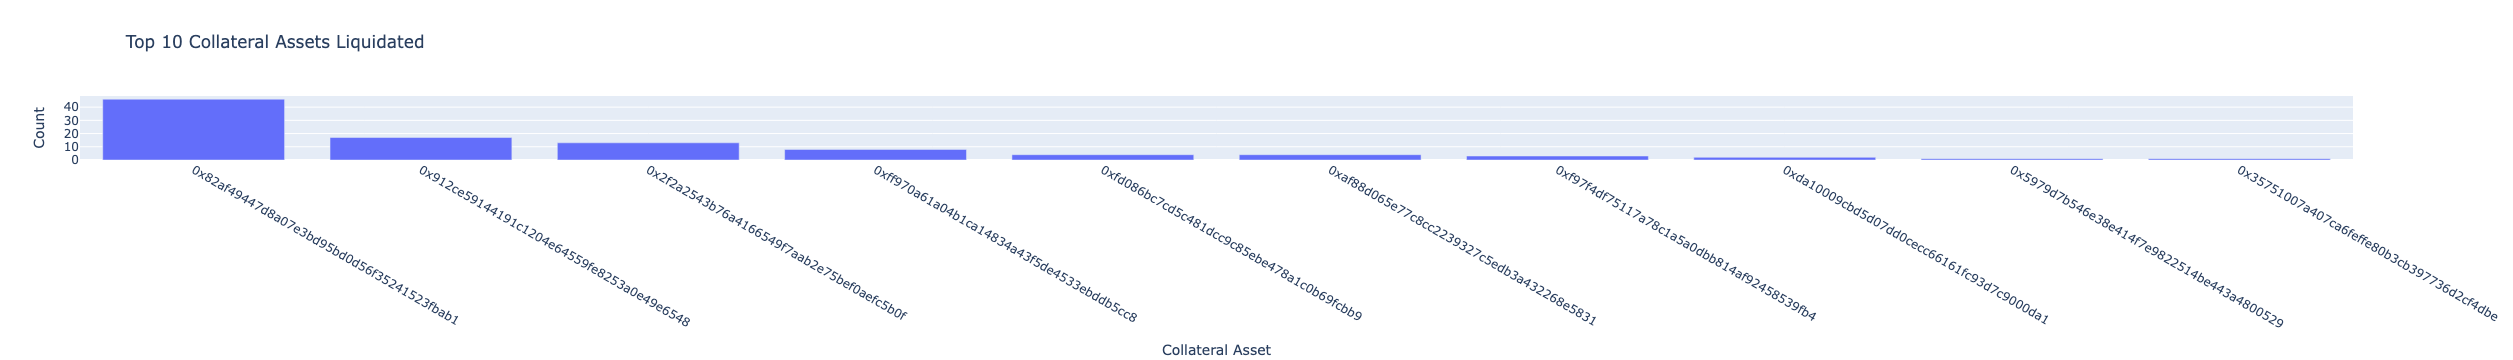

In [7]:
# Top collateral assets being liquidated
collateral_counts = df['collateral_asset'].value_counts().head(10)
px.bar(x=collateral_counts.index, y=collateral_counts.values, 
       title='Top 10 Collateral Assets Liquidated',
       labels={'x': 'Collateral Asset', 'y': 'Count'})